# **Ex3**

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import shap
from sklearn.preprocessing import StandardScaler
# load the data
import pandas as pd
cars_label_df = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
cars_features_df = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')
cars_features_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8.0,307.0,130.0,NaN,12.0,70.0,USA
1,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,NaN,318.0,150.0,3436.0,11.0,NaN,NaN
3,8.0,304.0,NaN,NaN,NaN,70.0,NaN
4,8.0,302.0,NaN,3449.0,10.5,70.0,USA
...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,NaN,82.0,USA
394,4.0,NaN,52.0,NaN,24.6,82.0,Europe
395,4.0,135.0,NaN,2295.0,11.6,NaN,USA
396,4.0,120.0,NaN,2625.0,18.6,82.0,USA


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.
###What features are meaningful?

###Answer:

**The most meaningful features are Cylinders and Displacement**






###what are the correlated features?

###Answer:

**we can see according to the heatmap correation plot the there is storng correlation between the next features:**

###Cylinders - Displacement - Horsepower - Weight (each of the combenations)



### EDA insights (5pts)

In [4]:
# EDA
print(cars_features_df.isna().sum())
print()
print(cars_label_df.isna().sum())
print()
cars_features_df['Model Year'].unique()

Cylinders        91
Displacement    110
Horsepower      114
Weight          105
Acceleration     93
Model Year       87
Origin           85
dtype: int64

MPG    0
dtype: int64



array([70., nan, 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82.])

In [5]:
print(cars_features_df.describe())
print()
print(cars_features_df.info())

        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.825252   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   75.000000  2234.000000     13.700000   
50%      5.000000    156.000000   95.000000  2795.000000     15.500000   
75%      8.000000    302.000000  130.000000  3620.000000     17.500000   
max      8.000000    455.000000  225.000000  4997.000000     24.600000   

       Model Year  
count  311.000000  
mean    76.122186  
std      3.673513  
min     70.000000  
25%     73.000000  
50%     76.000000  
75%     79.000000  
max     82.000000  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  

<ipython-input-6-0d8977ccafa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(cars_features_df.corr(), cmap="YlGnBu", annot=True)


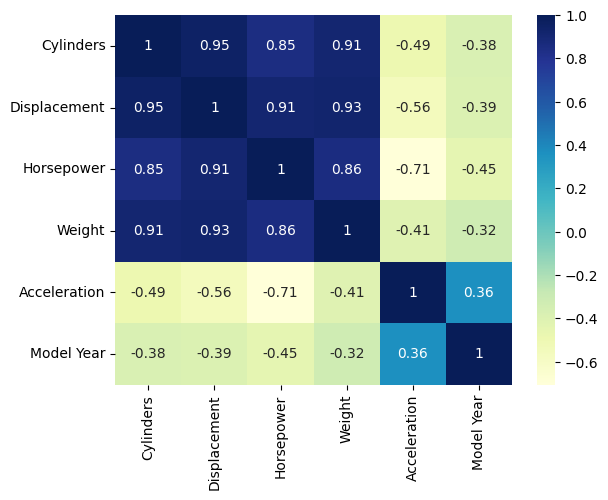

In [6]:
dataplot = sns.heatmap(cars_features_df.corr(), cmap="YlGnBu", annot=True)

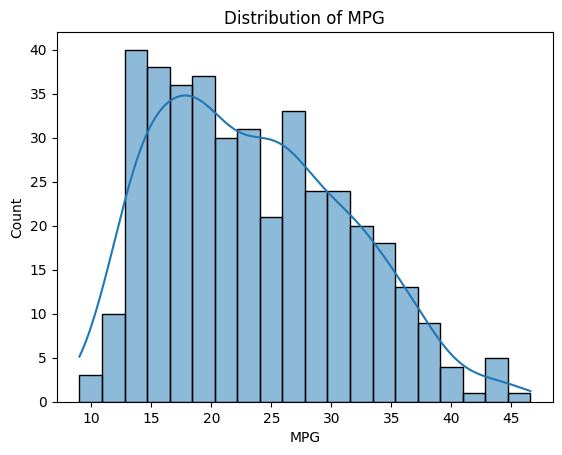

In [7]:
# Graph 1 -
sns.histplot(data = cars_label_df  , x = 'MPG' , kde = True , bins = 20)
plt.title('Distribution of MPG')
plt.show()

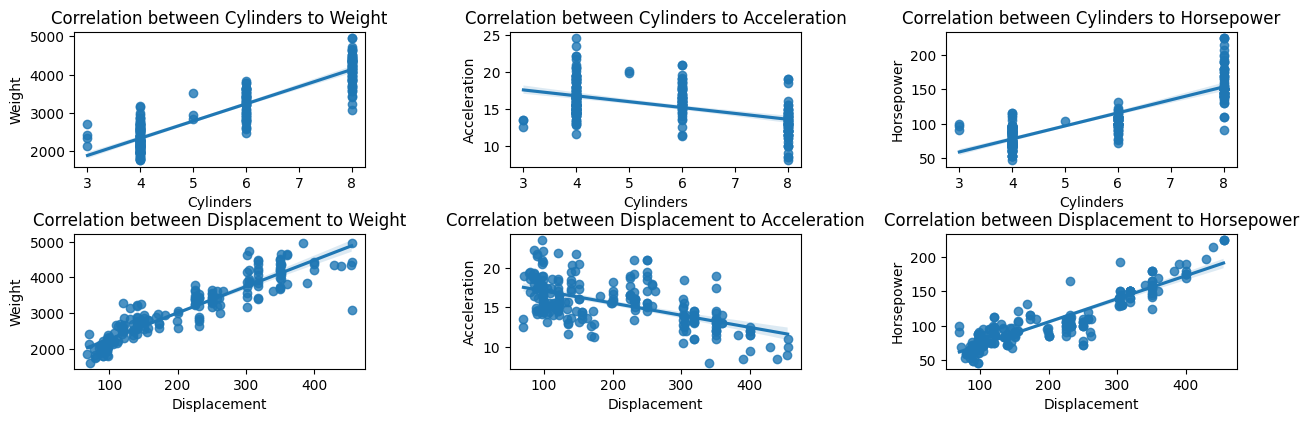

In [8]:
# Graph 2 -
plt.figure(1 , figsize = (15 , 7))
n = 0
features_corr_colmuns = cars_features_df.drop(['Model Year' , 'Origin'] , axis = 1)
features_corr_colmuns2 = features_corr_colmuns.columns
features_corr_list = list(features_corr_colmuns2)

for x in ['Cylinders', 'Displacement']:
    for y in ['Weight', 'Acceleration','Horsepower']:
          n += 1
          plt.subplot(3 , 3 , n)
          plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
          sns.regplot(x = x , y = y , data = cars_features_df)
          plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
          plt.title(f'Correlation between {x} to {y}')
plt.show()

What are you insgits based on the previuse visualization?

###Answer

**According to the distribution of MPG we can see that the labels of the MPG according to the data is from Normal distribution.
And as we can see accroding to the correlation plot , there is a few features that are correlate with other in the data , for example the Cylinder and Horsepower.**

### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

###Explain the reason for all methods that you apply.

##Answer:

**or handle missing values we use KNN imputer moudle that fill the missing values in the data by finding the closest K nearest neighbors.**

**before the KNN Imputer, we standardized the data the accurate the model and the KNN Imputer**

**by used this moudle we make sure that filling the missing values doesn't damage the Distribution of each clomun in the data (as we can see in the histplot before and after filling the missing values)**

**Note that we fill the Origin clomun by the most common value of this clomun - we did that cause we check and saw that the most common value is USA and we use this information to fill the NA valuess of the rest of the data and saves the Distribution of the Origin clomun**


**we didnt want to use the mean method for filling NA values cause we know that if we use this methods we willl make damage on the Distribution of the data and make a False insight on the data**

In [9]:
# # Preprocessing -


cars_features_df2 = cars_features_df.drop('Origin' , axis = 1)

scaler = StandardScaler()
scaler.fit(cars_features_df2)
standardized_data = scaler.transform(cars_features_df2)
cars_features_df2 = pd.DataFrame(standardized_data, columns=cars_features_df2.columns)


imputer = KNNImputer(n_neighbors=20)


cars_features_df3  = pd.DataFrame(imputer.fit_transform(cars_features_df2) , columns=['Cylinders', 'Displacement' , 'Horsepower', 'Weight', 'Acceleration', 'Model Year'  ])
cars_features_df3 = np.round(cars_features_df3)
cars_features_df3  = pd.DataFrame(imputer.fit_transform(cars_features_df3) , columns=['Cylinders', 'Displacement' , 'Horsepower', 'Weight', 'Acceleration', 'Model Year'  ])
cars_features_df3['Origin'] =  cars_features_df['Origin'].fillna(cars_features_df['Origin'].mode()[0])
cars_features_df3.isna().sum()

Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

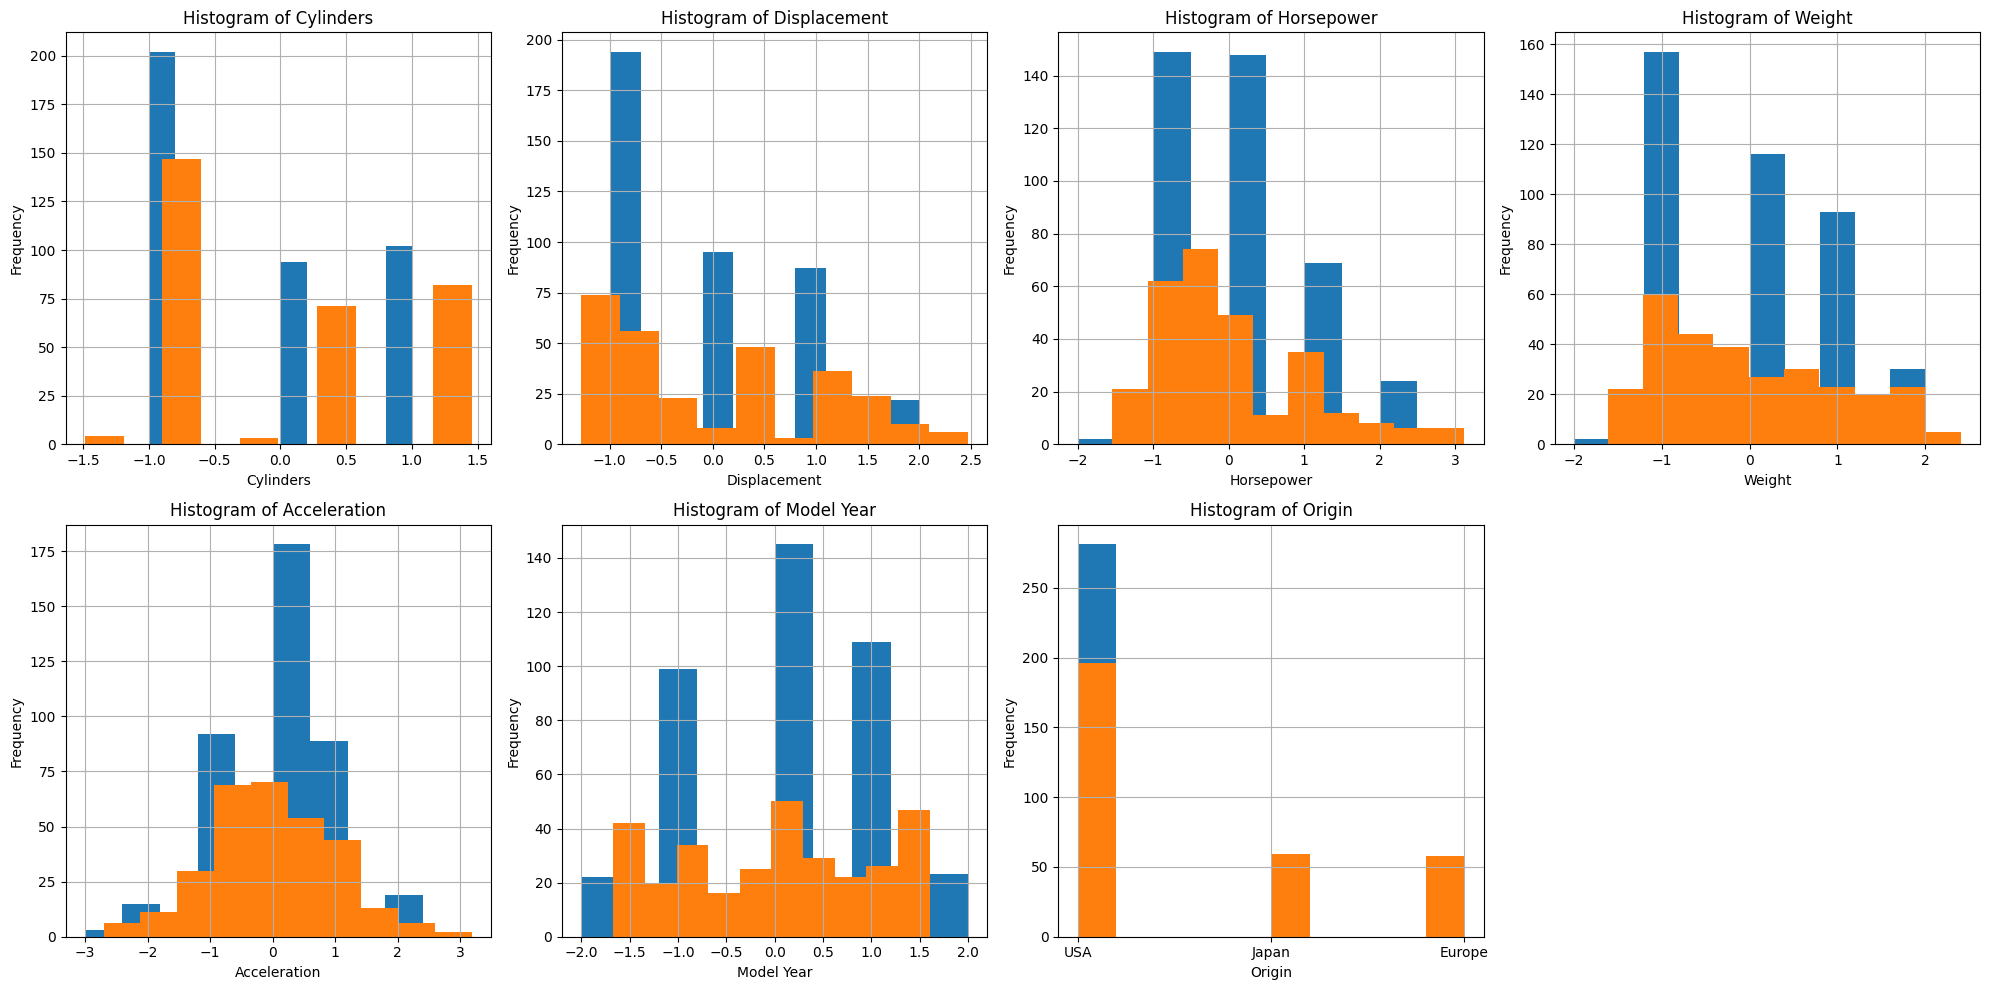

In [10]:
cars_features_df2['Origin'] = cars_features_df['Origin']


num_features = len(cars_features_df3.columns)
num_rows = 2
num_columns = num_features // num_rows + (num_features % num_rows > 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))

for i, column in enumerate(cars_features_df3.columns):
    ax = axs.flatten()[i]
    cars_features_df3[column].hist(ax=ax)
    cars_features_df2[column].hist(ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, num_rows*num_columns):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [11]:
cars_features_df3 = pd.get_dummies(cars_features_df3, columns=['Origin']) ## HotLabelIncoder!!!


### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check its performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

###Answer

**As we can see the MSE is gives a little bit high result while the r-squared shows better result
the model result is not so good at all, we can increase the preformance of the model by use ensamble learning may get higher  result**

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


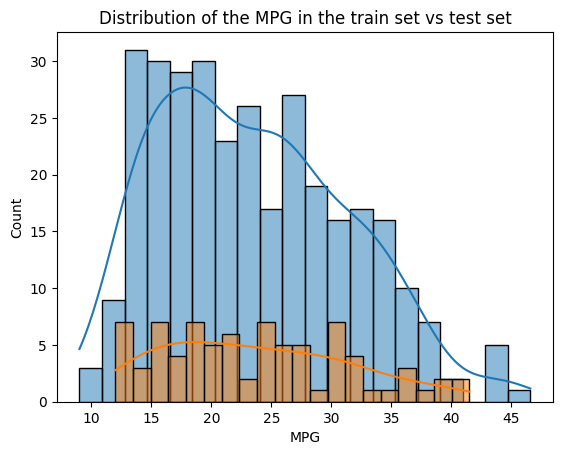

In [12]:
# Model training
bins = np.linspace(0, 1, 20) # Adjust the range and number of bins to match your target variable distribution
y_binned = np.digitize(cars_label_df, bins)
X_train, X_test, y_train, y_test = train_test_split(cars_features_df3, cars_label_df, test_size=0.2, random_state=42, stratify = y_binned)
print(sns.histplot(data = y_train  , x = 'MPG' , kde = True , bins = 20))
print(sns.histplot(data = y_test  , x = 'MPG' , kde = True , bins = 20))
plt.title('Distribution of the MPG in the train set vs test set')
plt.show()

In [13]:
# Create the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training data and the test data
y_pred = model.predict(X_test)

In [14]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2}")



Mean Squared Error (MSE): 18.555780318837048
R-squared (Coefficient of Determination): 0.684228071807128


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)



##Answer


1.

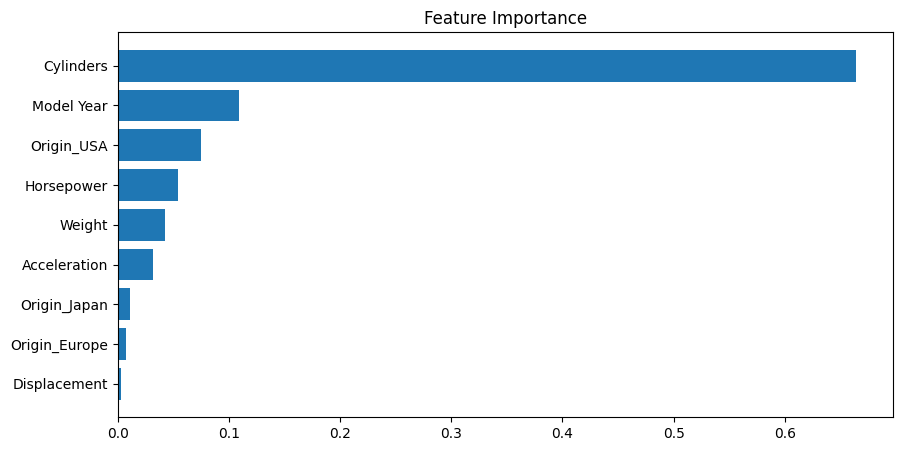

In [15]:
importances = model.feature_importances_
indices = np.argsort(importances)
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names)
plt.show()

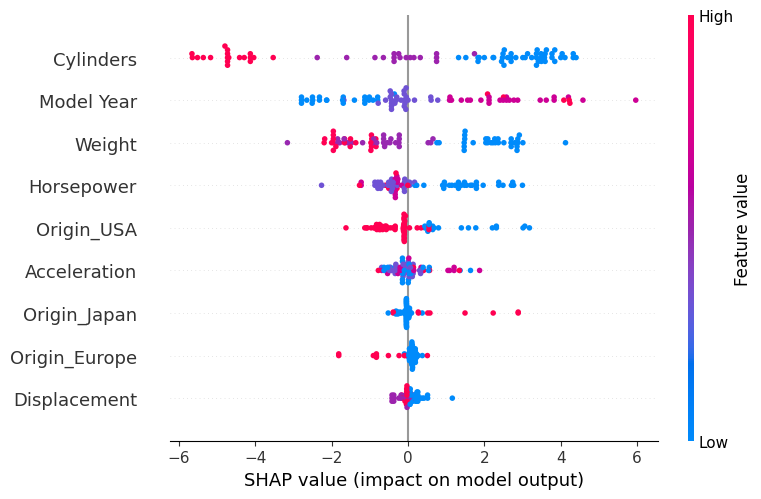

In [16]:
explainer = shap.TreeExplainer(model, X_train)

shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=cars_features_df3.columns)



###Answer

2.
***we did SHAP  for each car that we choose , from the SHAP result***

***we can see that for the car from Europe the Weight is the most significant feature that increase MPG predications (for high values of weight the MPG is getting low and by low values of weight the MPG predication is getting higher)***

**for the car from Japan the Cylinders is the most significant feature that increase MPG predications**

**for the car from USA the Model Year is the most significant feature that increase MPG predications**

In [17]:
X_test_Europe = X_test[X_test['Origin_Europe'] == 1 ][:1]
X_test_Japan = X_test[X_test['Origin_Japan'] == 1 ][:1]
X_test_USA = X_test[X_test['Origin_USA'] == 1 ][:1]
X_test_combined = pd.concat([X_test_Europe, X_test_Japan, X_test_USA])
X_test_combined


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
293,-1.0,-1.0,-1.0,-1.0,1.0,0.0,1,0,0
235,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,1,0
363,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1


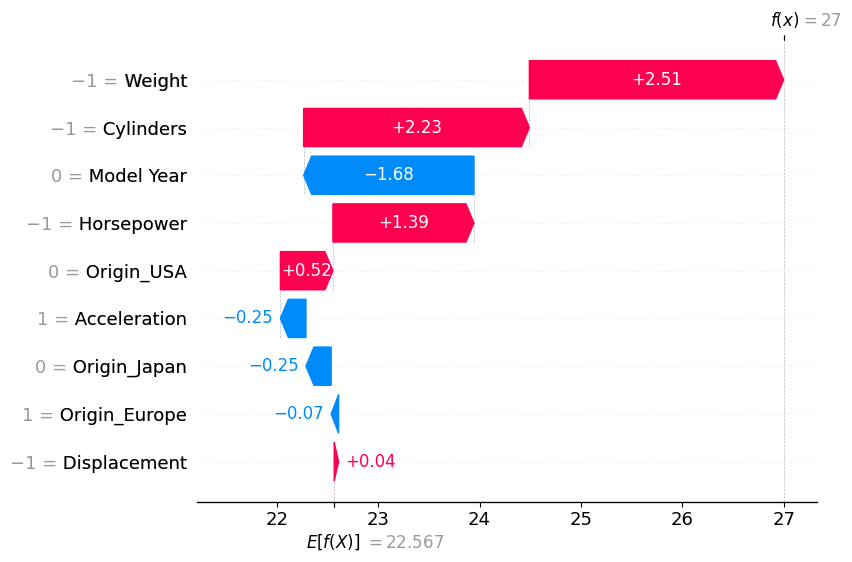

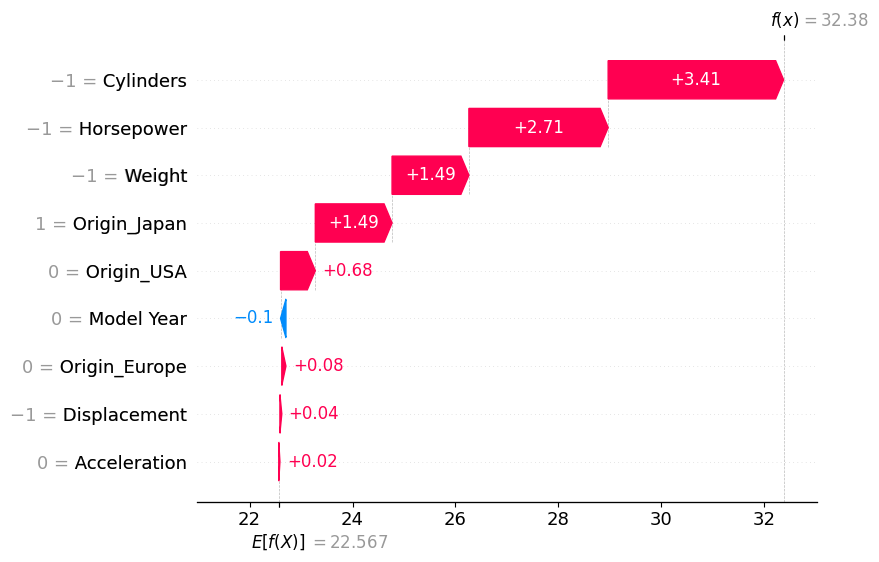

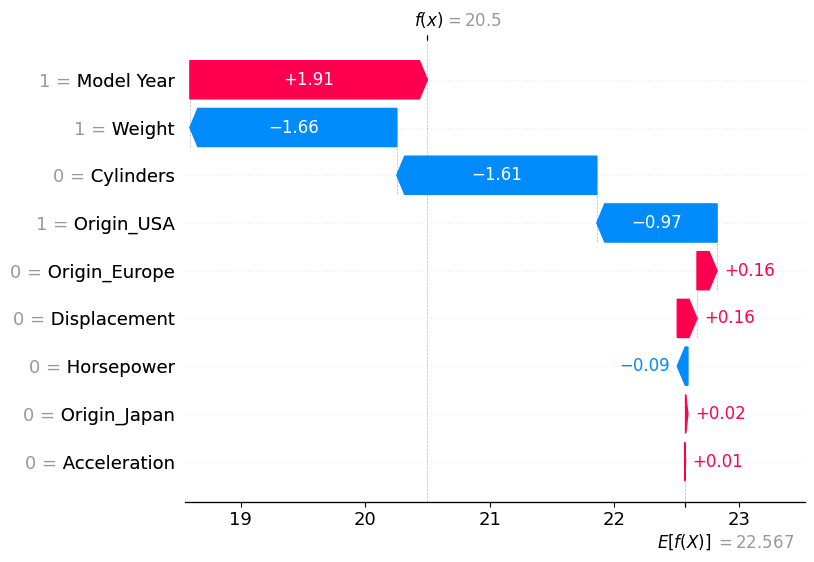

In [18]:
explainer2 = shap.TreeExplainer(model)

shap_values = explainer(X_test_combined)

shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[1])
shap.plots.waterfall(shap_values[2])

## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [19]:
from inspect import signature
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import numpy as np
import copy
from sklearn.model_selection import train_test_split


class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.Weighted_Models = []
        self.base_estimator_lst = []


    def fit(self, X, y):
        # implement the algorithm 43 from the lecture.
        # make sure the base_estimators are not same object (i.e. use deep copy or any other method to make sure they are different objects)
        Weights = [1/len(X)] * len(X)

        for i in range(0 , self.n_estimators):
          curr_estimator = copy.deepcopy(self.base_estimator)

          curr_estimator.fit(X, y ,sample_weight = Weights)
          self.base_estimator_lst.append(curr_estimator)



          y_pred = curr_estimator.predict(X)
          correct = (y_pred == y)
          incorrect_sum = sum(Weights[i] for i in range(len(correct)) if correct[i] == False)
          AOS = 0.5*np.log((1/incorrect_sum) - 1)
          self.Weighted_Models.append(AOS)
          for i in range(len(correct)):
            if correct[i] == True:
              Weights[i] = Weights[i] * np.exp(-AOS)
            else:
              Weights[i] = Weights[i] * np.exp(AOS)

          for i in range(len(Weights)):   #Normalizile
            Weights[i] = Weights[i]/sum(Weights)
    def predict(self, X):
      weighted_predictions = np.array([estimator.predict(X) for estimator in self.base_estimator_lst])
      final_prediction = np.sign(np.dot(self.Weighted_Models, weighted_predictions))
      return final_prediction





### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [32]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=12)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, train_size = 0.8)


In [33]:
DecisionTreeClassifier_d1 = DecisionTreeClassifier(max_depth=1 , random_state = 10)
DecisionTreeClassifier_d3 = DecisionTreeClassifier(max_depth=3 , random_state = 10)
SVM = svm.SVC(kernel='linear' , random_state = 10)
Model_lst = [DecisionTreeClassifier_d1 , DecisionTreeClassifier_d3 ,SVM ]

In [34]:
lst = [3,5,10]
AdaBoost_lst = []

for model in Model_lst:
  model_n_estimator = []
  for n_estimator in lst:
    adaboost = AdaBoost(n_estimator  , model)
    adaboost.fit(X_train , y_train)
    model_n_estimator.append(adaboost)
  AdaBoost_lst.append(model_n_estimator)



### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [35]:
from sklearn.metrics import accuracy_score, precision_score

In [36]:
string_lst = ['DescisionTree with Depth 1' , 'DescisionTree with Depth 3' , 'SVC']
num_of_estimatoprs = [3,5,10]
for i in range(len(AdaBoost_lst)):
  print("")
  print("")
  for j in range(len(AdaBoost_lst[i])):
    print("")
    y_pred = AdaBoost_lst[i][j].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f"Accuracy of {string_lst[i]} and numbers of estimators {num_of_estimatoprs[j]}: {accuracy}")
    print(f"Precision of {string_lst[i]} and numbers of estimators {num_of_estimatoprs[j]}: {precision}")





Accuracy of DescisionTree with Depth 1 and numbers of estimators 3: 0.725
Precision of DescisionTree with Depth 1 and numbers of estimators 3: 0.8636363636363636

Accuracy of DescisionTree with Depth 1 and numbers of estimators 5: 0.78
Precision of DescisionTree with Depth 1 and numbers of estimators 5: 0.8105263157894737

Accuracy of DescisionTree with Depth 1 and numbers of estimators 10: 0.77
Precision of DescisionTree with Depth 1 and numbers of estimators 10: 0.7714285714285715



Accuracy of DescisionTree with Depth 3 and numbers of estimators 3: 0.815
Precision of DescisionTree with Depth 3 and numbers of estimators 3: 0.8666666666666667

Accuracy of DescisionTree with Depth 3 and numbers of estimators 5: 0.875
Precision of DescisionTree with Depth 3 and numbers of estimators 5: 0.8611111111111112

Accuracy of DescisionTree with Depth 3 and numbers of estimators 10: 0.855
Precision of DescisionTree with Depth 3 and numbers of estimators 10: 0.8557692307692307



Accuracy of S

### Compare the number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the model error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

###Answer

**we can see that after aprox of 30 leanrner the error of training set is eqaul to 0 while the error of the test set is decreaced for each learner after the 30 estimators ->
we can understand that we need choose number of estimorts bigger then 30 to continue to decrease the error rate of the test set and the model it self**

In [37]:
DecisionTreeClassifier_d3 = DecisionTreeClassifier(max_depth=3 , random_state = 10)

estimator_list = [1,5,10,20,50,100]
AdaBoost_error_rate_Train = []
AdaBoost_error_rate_Test = []

for n_estimator in estimator_list:
  adaboost = AdaBoost(n_estimator  , DecisionTreeClassifier_d3)
  adaboost.fit(X_train, y_train)
  y_pred = adaboost.predict(X_train)
  error_rate_Train = sum(y_pred != y_train) / len(y_pred)
  AdaBoost_error_rate_Train.append(error_rate_Train)
  y_pred2 = adaboost.predict(X_test)
  error_rate_Test = sum(y_pred2 != y_test)  / len(y_pred2)
  AdaBoost_error_rate_Test.append(error_rate_Test)




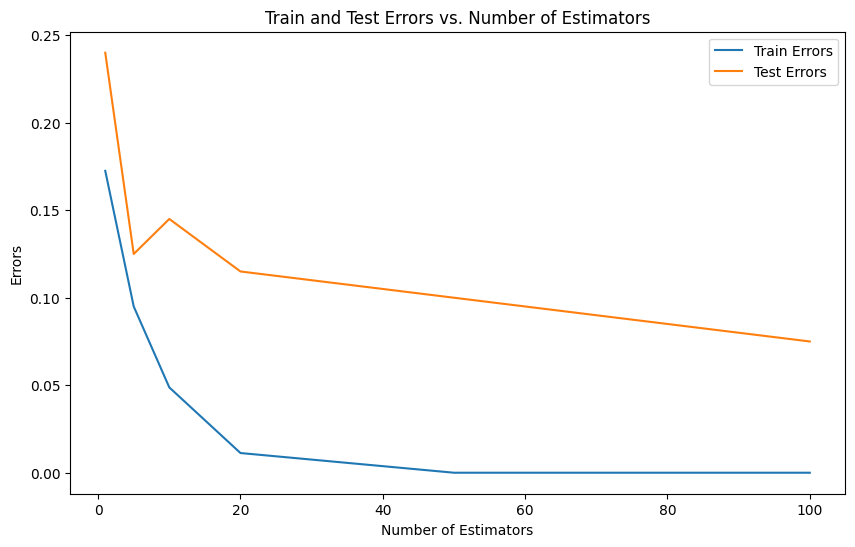

In [38]:
import matplotlib.pyplot as plt

# Plot train_errors and test_errors on the same plot
plt.figure(figsize=(10, 6))
plt.plot(estimator_list, AdaBoost_error_rate_Train, label='Train Errors')
plt.plot(estimator_list, AdaBoost_error_rate_Test, label='Test Errors')
plt.xlabel('Number of Estimators')
plt.ylabel('Errors')
plt.title('Train and Test Errors vs. Number of Estimators')
plt.legend()
plt.show()

## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.